--- Data Loaded Successfully ---
Preview of the data for modeling:
   tenure_months  watch_hours_per_week  churn  country_Malaysia  \
0             17                   6.5      0             False   
1             22                  12.0      0             False   
2              3                  15.6      0             False   
3             14                   8.1      0             False   
4              9                  11.4      1              True   

   country_Philippines  country_Singapore  country_Thailand  country_Vietnam  \
0                False               True             False            False   
1                False              False              True            False   
2                False               True             False            False   
3                False               True             False            False   
4                False              False             False            False   

   plan_type_Premium  plan_type_Standard  age_gro

C:\Users\KARAN\AppData\Local\Temp\ipykernel_2016\415811130.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances, palette='viridis')


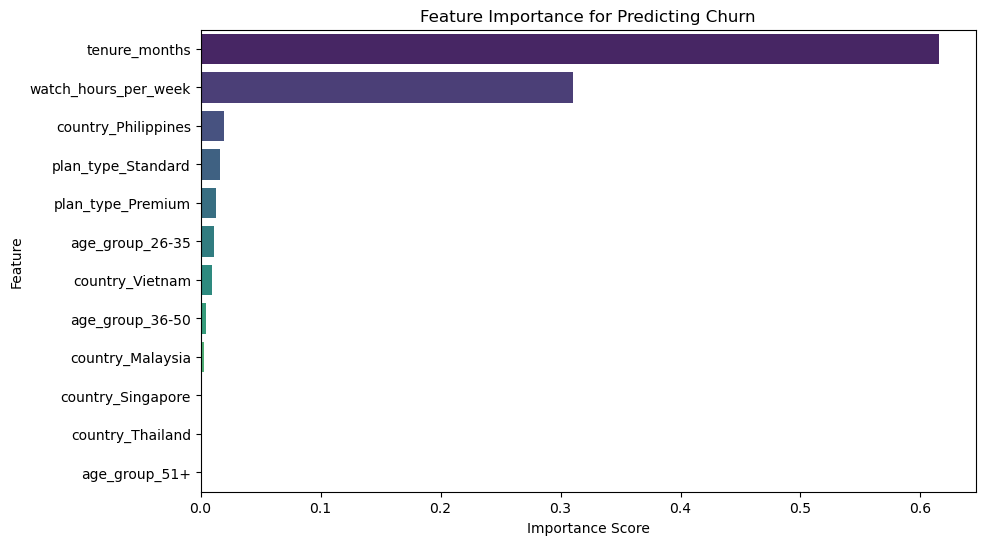

In [1]:
# --- 1. Import Necessary Libraries ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- 2. Load the Prepared Data ---
# This is the clean, numerical data we created in Step 2.
df = pd.read_csv('disney_plus_prepared_for_modeling.csv')

print("--- Data Loaded Successfully ---")
print("Preview of the data for modeling:")
print(df.head())

# --- 3. Define Features (X) and Target (y) ---
# 'X' contains all the predictive factors.
# 'y' is the outcome we want to predict (churn).
X = df.drop('churn', axis=1)
y = df['churn']

# --- 4. Split Data into Training and Testing Sets ---
# We train the model on 80% of the data and test its performance on the unseen 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData split into {len(X_train)} training samples and {len(X_test)} testing samples.")

# --- 5. Train and Evaluate Model 1: Logistic Regression ---
# This model is good for understanding probabilities.
print("\n--- Training Logistic Regression Model ---")
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

print("\n--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(classification_report(y_test, y_pred_log))

# --- 6. Train and Evaluate Model 2: Decision Tree ---
# This model is excellent for identifying the most important factors.
print("\n--- Training Decision Tree Model ---")
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

print("\n--- Decision Tree Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(classification_report(y_test, y_pred_tree))

# --- 7. Identify Key Churn Drivers ---
# We ask the Decision Tree model which features it found most important.
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n--- Top Churn Drivers ---")
print(importances)

# Visualize the feature importances
print("\nGenerating plot: Feature Importance...")
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances, palette='viridis')
plt.title('Feature Importance for Predicting Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()